# **MEHWISH ZAMAN (DATA ANALYST)**
***AN INTERN AT OASIS INFOBYTE***


# **Idea: Cleaning Data**

# DESCRIPTION:
Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential
part of data analysis, and demonstrating your data cleaning skills is key to landing a job. Here
are some projects to test out your data cleaning skills:


# Key Concepts and Challenges:
  

1. Data Integrity: Ensuring the accuracy, consistency, and reliability of data throughout the cleaning process.
2. Missing Data Handling: Dealing with missing values by either imputing them or making informed decisions on how to handle gaps in the dataset.
3. Duplicate Removal: Identifying and eliminating duplicate records to maintain data uniqueness.
4. Standardization: Consistent formatting and units across the dataset for accurate analysis.
5. Outlier Detection: Identifying and addressing outliers that may skew analysis or model performance.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!unzip /content/archive_clean.zip

In [ ]:
# Load Dataset
# Dataset First Look
df = pd.read_csv('/content/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# Dataset Rows & Columns count.
df.shape

(48895, 16)

In [ ]:
# Dataset Columns.
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe.
df.describe()

NameError: name 'df' is not defined

In [ ]:
# Dataset Info.
df.info()

NameError: name 'df' is not defined

In [ ]:
# Checking Unique Values for each variable.
unique_values = df.nunique()
unique_values


id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
# Check for duplicates
print(f"Number of duplicates:\n{df.duplicated().sum()}")

Number of duplicates:
0


In [ ]:
# Missing Values/Null Values Count.
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
# Dropping id, host_name, last_review columns as they are unnecessary and will not impact our analysis and dataset
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [ ]:
# Filling null entries in name column with 'Unknown'
df['name'].fillna('Unknown', inplace=True)


# Filling null entries of reviews_per_month column with mean of all the other values of that column
mean_reviews_per_month = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)


# Checking null entries after filling Null values
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.price.describe()

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

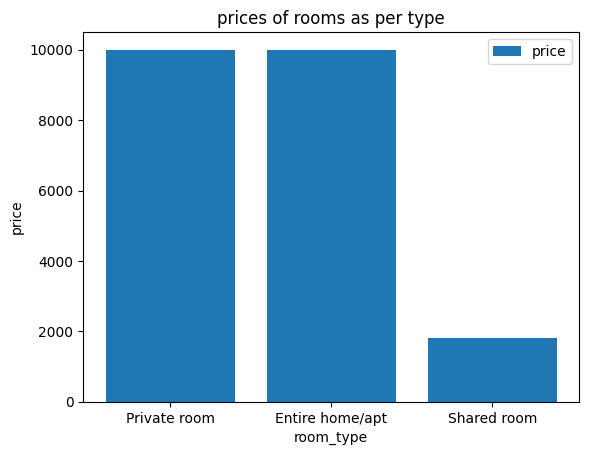

In [ ]:
plt.bar(x=df['room_type'], height=df['price'],label="price")
plt.xlabel('room_type')
plt.ylabel('price')
plt.title('prices of rooms as per type')
plt.legend()
plt.show()

In [ ]:
#Identify and drop non-numeric columns
non_numeric_columns=df.select_dtypes(exclude=[np.number]).columns
df_numeric=df.drop(columns=non_numeric_columns,axis=1)

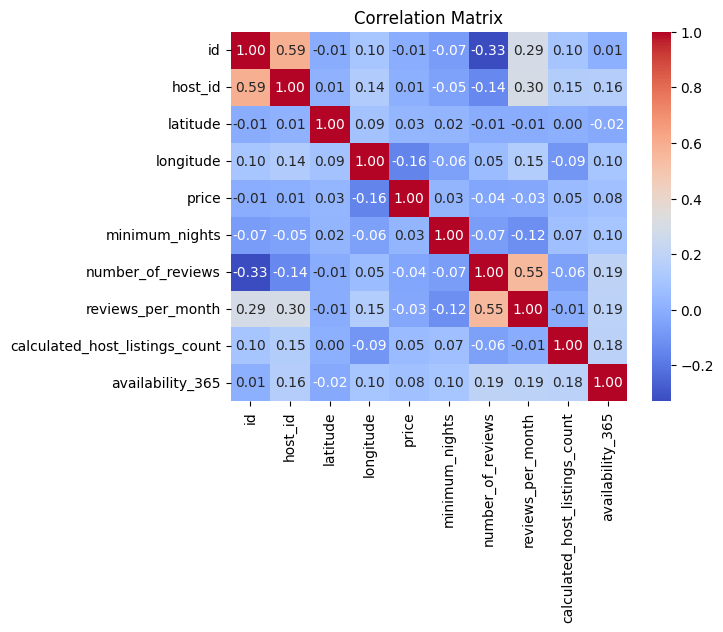

In [ ]:
#Correlation matrix
correlation_matrix=df_numeric.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

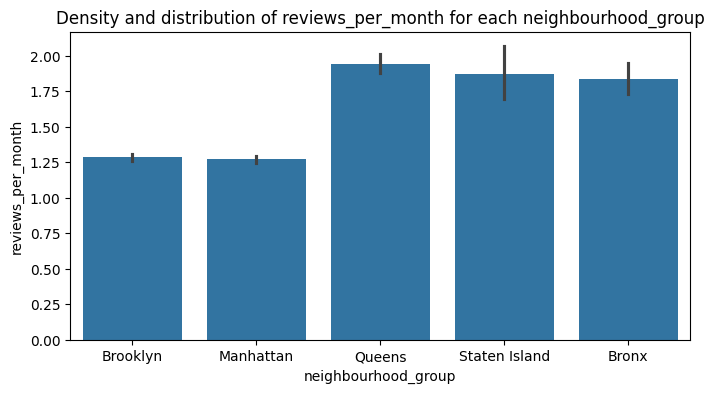

In [ ]:
# Visualising distribution of reviews_per_month for each neighberhood_group

plt.figure(figsize = (8,4))
plt.title('Density and distribution of reviews_per_month for each neighbourhood_group')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df)
plt.show()

# conclusion:

1.  I had found that some of the hosts take good advantage of the Airbnb platform and provide the most listing.

2.  I found the locations with most number of listings, Manhattan and Brooklyn are the neighbourhoods with more than 20000 listings.
3.  I looked into the room_type column from there i found that "Entire home/apt" and "Private room" are the popular room types with more than 20000 listings on Airbnb platform.
4. I proceed with analyzing price and neighbouhood group lising densities and what areas were more popular than another.
5. I looked into the price of and analysed that 'Entire home/apt" and private room room type are  expensive compared to shared room.
# suggestion:
While doing this data analysis i found out a lot of informative things and it would be nice if dataset will have couple of additional feaures such as (0-5 stars) reviews for each listing, addition of these feature would help me to determine the best reviewed host for NYC along with number_of_review column that is provided.
Overall, I discovered a very good number of interesting relationships between features and explained each step of the process.